In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

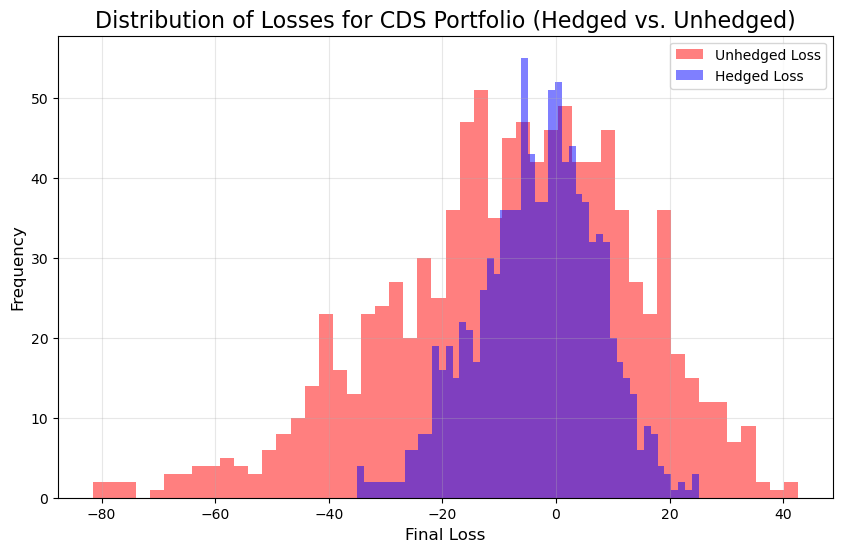

In [12]:
def plot_final_loss_distribution(loss_unhedged, loss_hedged):
    """
    Plots the histogram of final losses for both hedged and unhedged portfolios.
    
    Args:
        loss_unhedged (np.ndarray): Final losses for the unhedged portfolio.
        loss_hedged (np.ndarray): Final losses for the hedged portfolio.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(loss_unhedged, bins=50, alpha=0.5, label="Unhedged Loss", color='red')
    plt.hist(loss_hedged, bins=50, alpha=0.5, label="Hedged Loss", color='blue')
    
    plt.title("Distribution of Losses for CDS Portfolio (Hedged vs. Unhedged)", fontsize=16)
    plt.xlabel("Final Loss", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_final_loss_distribution(final_loss_unhedged, final_loss_hedged)

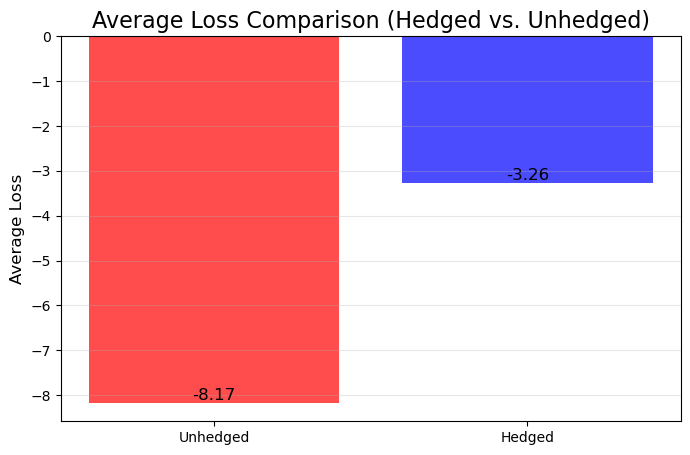

In [13]:
def plot_average_loss(final_loss_unhedged, final_loss_hedged):
    """
    Calculates and plots the average loss for both hedged and unhedged portfolios.
    
    Args:
        final_loss_unhedged (np.ndarray): Final loss for the unhedged portfolio.
        final_loss_hedged (np.ndarray): Final loss for the hedged portfolio.
    """
    avg_loss_unhedged = np.mean(final_loss_unhedged)
    avg_loss_hedged = np.mean(final_loss_hedged)
    
    labels = ['Unhedged', 'Hedged']
    values = [avg_loss_unhedged, avg_loss_hedged]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['red', 'blue'], alpha=0.7)
    plt.title("Average Loss Comparison (Hedged vs. Unhedged)", fontsize=16)
    plt.ylabel("Average Loss", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    for i, value in enumerate(values):
        plt.text(i, value, f"{value:.2f}", ha='center', va='bottom' if value < 0 else 'top', fontsize=12)
    
    plt.show()

plot_average_loss(final_loss_unhedged, final_loss_hedged)


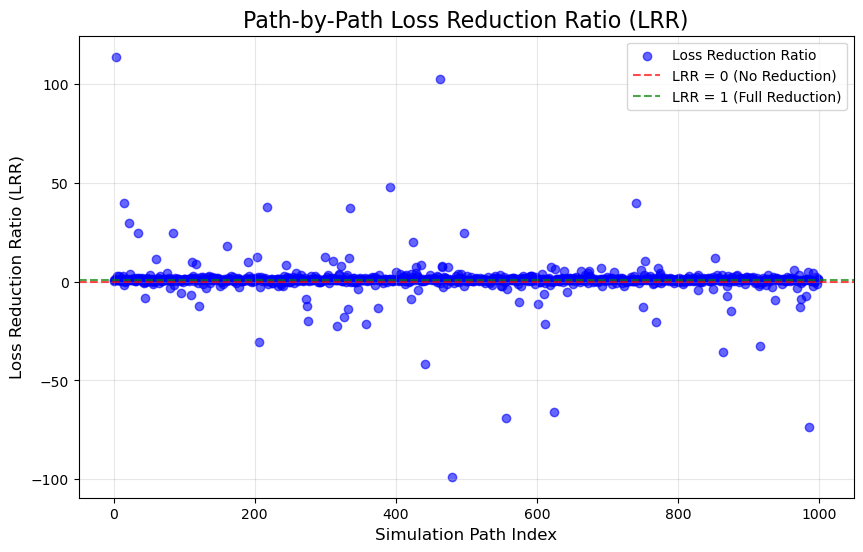

In [21]:
def plot_loss_reduction_ratio_scatter(final_loss_unhedged, final_loss_hedged):
    """
    Calculates the Loss Reduction Ratio (LRR) and visualizes it using a scatter plot.
    
    Args:
        final_loss_unhedged (np.ndarray): Final losses for the unhedged portfolio.
        final_loss_hedged (np.ndarray): Final losses for the hedged portfolio.
    """
    # Avoid division by zero by adding a small epsilon
    epsilon = 1e-8
    loss_reduction_ratios = 1 - (final_loss_hedged / (final_loss_unhedged + epsilon))
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(
        np.arange(len(loss_reduction_ratios)),
        loss_reduction_ratios,
        alpha=0.6,
        color='blue',
        label="Loss Reduction Ratio"
    )
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label="LRR = 0 (No Reduction)")
    plt.axhline(y=1, color='green', linestyle='--', alpha=0.7, label="LRR = 1 (Full Reduction)")
    plt.title("Path-by-Path Loss Reduction Ratio (LRR)", fontsize=16)
    plt.xlabel("Simulation Path Index", fontsize=12)
    plt.ylabel("Loss Reduction Ratio (LRR)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


plot_loss_reduction_ratio_scatter(final_loss_unhedged, final_loss_hedged)
